# ITAcademy - Data Science amb Python

## Sprint 4, Tasca 1: Visualització gràfica d'un dataset

### Introducció

Aquest Dataset està compost per les següents variables:

1. **Year**: 2008
2. **Month**: 1-12
3. **DayofMonth**: 1-31
4. **DayOfWeek**: 1 (Dilluns) - 7 (Diumenge)
5. **DepTime**: Hora de sortida real (local, hhmm)
6. **CRSDepTime**: Hora de sortida programada (local, hhmm)
7. **ArrTime**: Hora d'arribada real (local, hhmm)
8. **CRSArrTime**: Hora d'arribada programada (local, hhmm)
9. **UniqueCarrier**:  Codi d'operador únic
10. **FlightNum**: Número de vol
11. **TailNum**: Matrícula de l'avió
12. **ActualElapsedTime**: Temps transcorregut real (en minuts)
13. **CRSElapsedTime**: Temps transcorregut programat (en minuts)
14. **AirTime**: Temps en l'aire (en minuts)
15. **ArrDelay**: Retràs en l'arribada (en minuts; \[*1]
16. **DepDelay**: Retràs en la sortida (en minuts)
17. **Origin**: Codi IATA de l'aeroport d'origen
18. **Dest**: Codi IATA de l'aeroport de destí
19. **Distance**: Distància (en milles)
20. **TaxiIn**: Rodatge a pista (en minuts)
21. **TaxiOut**: Rodatge a porta (en minuts)
22. **Cancelled**: Si el vol ha sigut o no cancel·lat
23. **CancellationCode**: Codi amb el motiu de la cancel·lació (A = operadora, B = clima, C = NAS, D = seguretat)
24. **Diverted**: Desviat (1 = si, 0 = no)
25. **CarrierDelay**: Retràs degut a l'operador (en minuts) \[*2]
26. **WeatherDelay**: Retràs degut al clima (en minuts): \[*3]
27. **NASDelay**: Retràs degut al NAS (en minuts) \[*4]
28. **SecurityDelay** Retràs degut a Seguretat (en minuts) \[*5]
29. **LateAircraftDelay** Retràs acumulat de l'avió (en minuts) \[*6]


\[*1] "A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS)")

\[*2] "Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays."

\[*3] "Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival."

\[*4] "Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc."

\[*5] "Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas."

\[*6] "Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation."

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv("DelayedFlights.csv", index_col=0)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


### Exercici 1

#### 1.1. Visualització de la variable categòrica UniqueCarrier

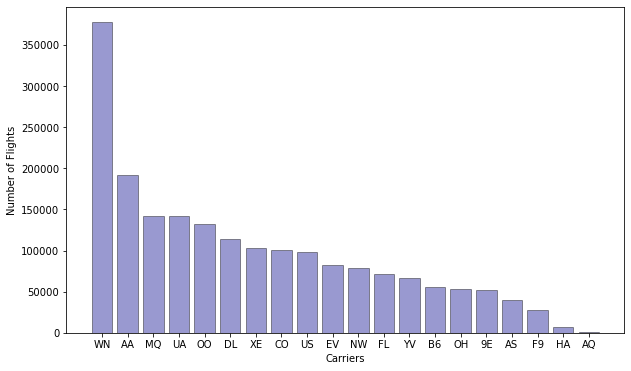

In [71]:
values = df["UniqueCarrier"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(values.index,
       values,
       color = "darkblue",
       edgecolor = "black",
       alpha = 0.4
       )

ax.set(xlabel = "Carriers", 
       ylabel = "Number of Flights")

plt.show()

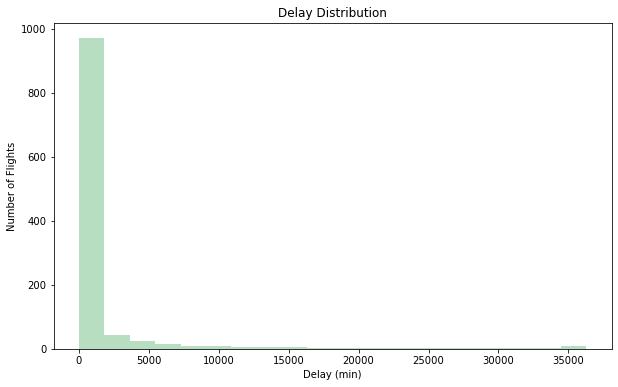

In [68]:
values = df["ArrDelay"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
n_bins = 20

ax.hist(values,
        bins = n_bins,
        color = "#88c999",
        alpha=0.6)

ax.set(xlabel = "Delay (min)",
       ylabel = "Number of Flights",
       title = "Delay Distribution")

plt.show()

In [44]:
values.index

Float64Index([  10.0,    8.0,    7.0,    9.0,    6.0,   11.0,   12.0,    5.0,
                13.0,    4.0,
              ...
               683.0,  712.0,  861.0,  702.0, 1189.0, 1177.0,  978.0,  989.0,
              1291.0,  -61.0],
             dtype='float64', length=1128)

In [45]:
values

10.00       36291
8.00        35902
7.00        35869
9.00        35782
6.00        35522
            ...  
1,177.00        1
978.00          1
989.00          1
1,291.00        1
-61.00          1
Name: ArrDelay, Length: 1128, dtype: int64